In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as  plt


In [3]:
df = pd.read_csv(r"C:\Users\habib\OneDrive\المستندات\Depi_workingSpace\Depi_workigSpace\Contents\ML\Session9[Unsupervised]\In_Session\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

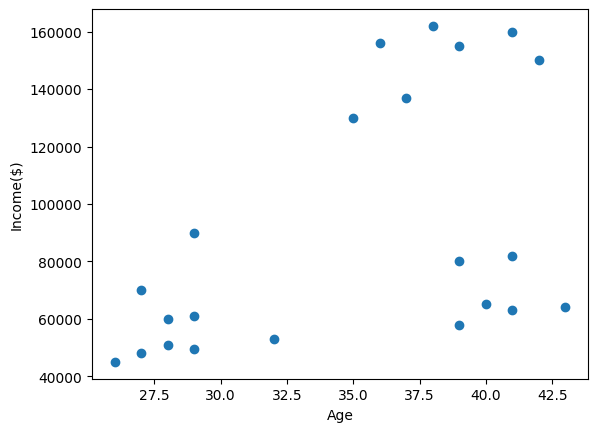

In [5]:
plt.scatter(df.Age , df['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income($)")


In [10]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [13]:
df['cluster'] = y_predicted
df.head(10)

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,2
5,Gautam,39,155000,2
6,David,41,160000,2
7,Andrea,38,162000,2
8,Brad,36,156000,2
9,Angelina,35,130000,0


In [12]:
km.cluster_centers_

array([[3.60000000e+01, 1.33500000e+05],
       [3.32000000e+01, 6.26333333e+04],
       [3.92000000e+01, 1.56600000e+05]])

Text(0, 0.5, 'Income($)')

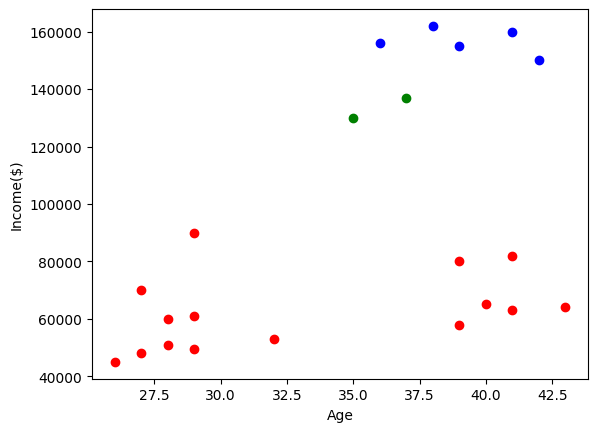

In [16]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age,df1['Income($)'], color = 'green')
plt.scatter(df2.Age,df2['Income($)'], color = 'red')
plt.scatter(df3.Age,df3['Income($)'], color = 'blue')

plt.xlabel("Age")
plt.ylabel("Income($)")


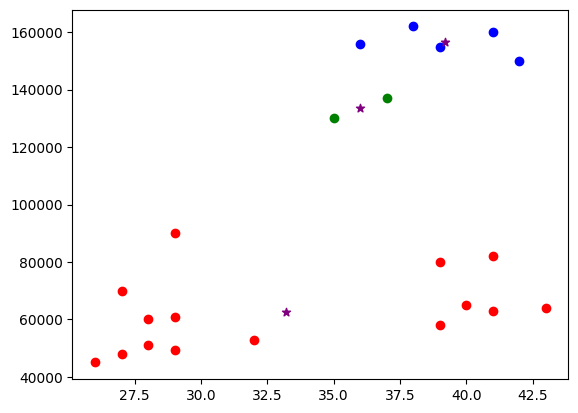

In [ ]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age,df1['Income($)'], color = 'green')
plt.scatter(df2.Age,df2['Income($)'], color = 'red')
plt.scatter(df3.Age,df3['Income($)'], color = 'blue')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1] , color = 'purple' , marker="*" , label='centroid')
plt.xlabel("Age")
plt.ylabel("Income($)")

In [17]:
# need to do scaling first
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])


In [18]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [19]:
df['cluster'] = y_predicted
df.head(10)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [20]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

Text(0, 0.5, 'Income($)')

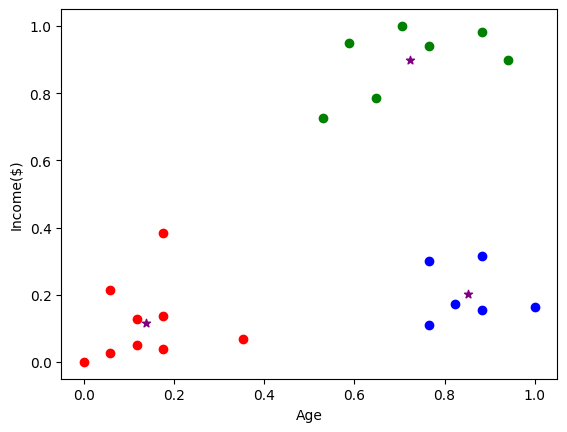

In [21]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age,df1['Income($)'], color = 'green')
plt.scatter(df2.Age,df2['Income($)'], color = 'red')
plt.scatter(df3.Age,df3['Income($)'], color = 'blue')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1] , color = 'purple' , marker="*" , label='centroid')
plt.xlabel("Age")
plt.ylabel("Income($)")

In [ ]:
### ELBOW Method

see =[]
k_rng = range(1,10)
for k in k_rng:
    km= KMeans(n_clusters= k)
    km.fit(df[['Age','Income($)']])
    see.append(km.inertia_)

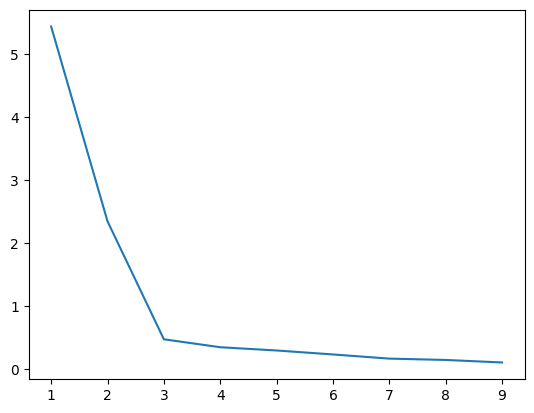

In [26]:
plt.plot(k_rng,see)